<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

Загрузить датасет по url:


In [2]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

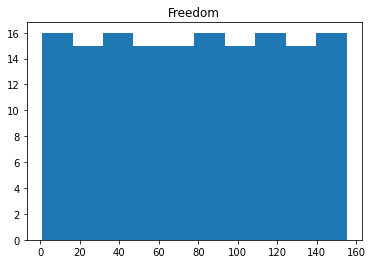

Равномерное распределение


In [4]:
freedom = df['Freedom']

plt.hist(freedom)
plt.title('Freedom')
plt.show()

print('Равномерное распределение')

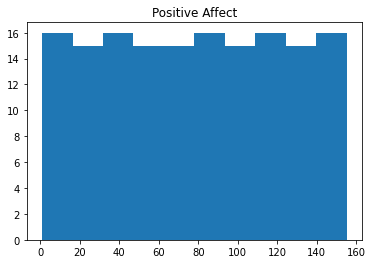

Равномерное распределение


In [5]:
positive_affect = df['Positive affect']

plt.hist(positive_affect)
plt.title('Positive Affect')

plt.show()

print('Равномерное распределение')

*Данное распределение - равномерное*

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

*Сразу же найдем пропущенные значение и отнесем их к выбросам:*

In [6]:
df.loc[pd.isna(df['Freedom'])]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


*Страну Qatar и ее значение Freedom можно отнести к выбросам.*

Медиана: 78.0
Математическое ожидание: 78.0
Стандартное отклонение: 44.88875137492688
Дисперсия: 2015.0
Минимум: 1.0
Максимум: 155.0
Размах: 154.0


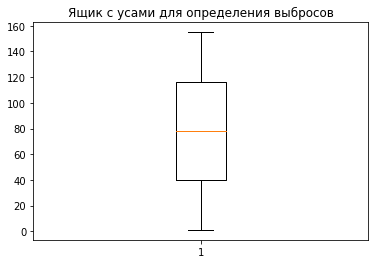

In [7]:
print('Медиана:', df['Freedom'].median())
print('Математическое ожидание:', df['Freedom'].mean())
print('Стандартное отклонение:', df['Freedom'].std())
print('Дисперсия:', df['Freedom'].var())
print('Минимум:', df['Freedom'].min())
print('Максимум:', df['Freedom'].max())
print('Размах:', df['Freedom'].max() - df['Freedom'].min())

# Ящик с усами для определения выбросов
plt.boxplot(df['Freedom'].dropna())
plt.title('Ящик с усами для определения выбросов')
plt.show()

*Как можно видеть из полученного графика, выбросов у столбца Freedom больше нет*

Почему нельзя найти моду?

*Моду невозможно найти по причине того, что абсолютно все значения столбца Freedom различны*

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

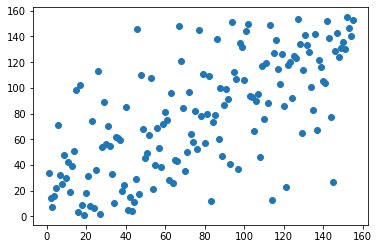

In [8]:
plt.scatter(x=df['Positive affect'], y=df['Freedom'])
plt.show()

In [9]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['Positive affect'].dropna(),
                         df['Freedom'].dropna())
print(corr)

0.6817698430601657


*Коэффициент положителен - отсюда корреляция прямая, а не обратная*

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [10]:
from sklearn.preprocessing import MinMaxScaler

new_data = MinMaxScaler(feature_range=(-1,1)).fit_transform(
    df['Freedom'].values.reshape(-1, 1)
)

print(min(new_data))
print(max(new_data))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

<AxesSubplot:>

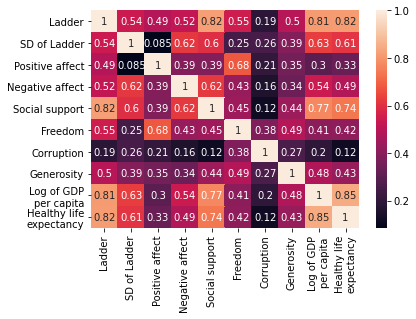

In [11]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

Загрузить таблицу цен на авокадо: 

In [13]:
df=pd.read_csv('avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

(array([ 331., 2632., 4824., 4506., 3412., 1672.,  598.,  177.,   86.,
          11.]),
 array([0.44 , 0.721, 1.002, 1.283, 1.564, 1.845, 2.126, 2.407, 2.688,
        2.969, 3.25 ]),
 <BarContainer object of 10 artists>)

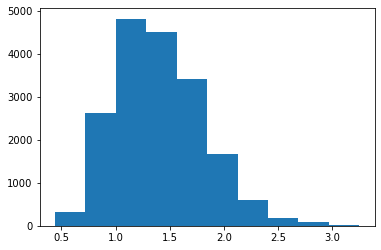

In [14]:
average_price = df['AveragePrice']

plt.hist(average_price)

*Данное распределение является нормальным*

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

<AxesSubplot:>

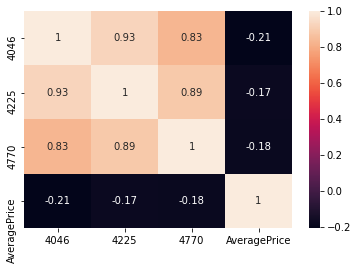

In [15]:
df = df[['4046', '4225', '4770', 'AveragePrice']]

sns.heatmap(df.corr(), annot=True)

*У колонок 4046, 4225 и 4770 наблюдается прямая корреляция, то есть чем больше значения в одной из колонок, тем больше эти значения будут и у других.<br>
AveragePrice находится ближе к обратной корреляции со столбцами 4046, 4225 и 4770(хоть и она не сильная), то есть чем больше значения в этих столбцах, тем меньше они у AveragePrice.*